In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
con = sqlite3.connect('/mydata/final.sqlite')
 

In [32]:
final = pd.read_sql_query(""" SELECT * FROM Reviews""", con)

In [33]:
final = final.sample(n = 2000)
final.shape

(2000, 12)

In [34]:
l = final['Score']
final = final.drop("Score", axis = 1)

In [35]:
tf_idf_vect = TfidfVectorizer(ngram_range = (1,2))
final_tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values)


In [36]:
print("type = ", type(final_tf_idf))
print("shape = ", final_tf_idf.get_shape())
print("number of unique words ", final_tf_idf.get_shape()[1])

type =  <class 'scipy.sparse.csr.csr_matrix'>
shape =  (2000, 64513)
number of unique words  64513


In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
final_df = pd.DataFrame(final_tf_idf.toarray())

In [40]:
standardized_data = StandardScaler(with_mean = False).fit_transform(final_tf_idf)
                                                                    

In [41]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
standardized_data = standardized_data.toarray()
tsne_data = model.fit_transform(standardized_data)

In [42]:
tsne_data = np.vstack((tsne_data.T, l)).T

In [43]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

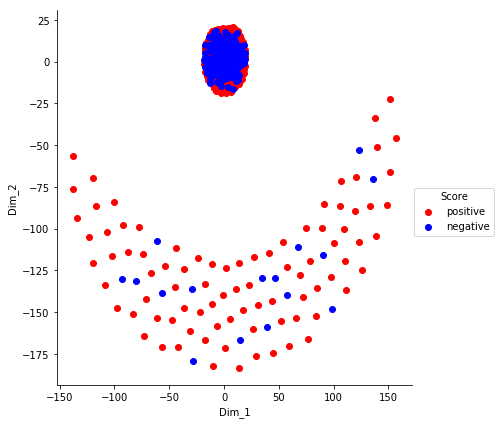

In [48]:
d = dict(color=["r", "b"])
sn.FacetGrid(tsne_df,hue = "Score", hue_kws=d,size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [49]:
model = TSNE(n_components=2, random_state = 0, perplexity = 10, n_iter = 5000)
tsne_data = model.fit_transform(standardized_data)

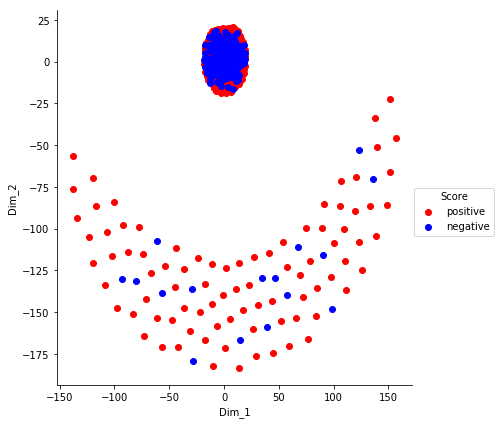

In [50]:
d = dict(color=["r", "b"])
sn.FacetGrid(tsne_df,hue = "Score", hue_kws=d,size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()